# Numerische Methoden für Differentialgleichungen

## Aufgabenblatt 3
*gelöst von Stollmayer Max*

### Aufgabe 1

Sei $y_{n+1} = y_n + h\ \Phi (t_n, y_n, h)$ eine explizite Ein-Schritt-Methode mit $\Phi (t, y, h) = a_1\ f(t,y) + a_2\ f\big(t+b_2\ h,\ y+ b_2\ h\ f(t,y)\big)$ und Koeffizienten $a_1 = \frac{1}{4},\ a_2 = \frac{1}{4},\ b_2 = \frac{2}{3}$ für das Modellproblem sei $y' = \lambda\ y$ mit $\lambda > 0$.

Die Folge $(y_n)_{n \ge 0}$ ist genau dann beschränkt, wenn $-\frac{2}{\lambda} \le h \le 0$ gilt.

#### Beweis
Für $y' = \lambda\ y$ ist $f(t,y) = f(y) = \lambda\ y$. Damit lässt sich $y_{n+1}$ explizit hinschreiben:

\begin{align*}
y_{n+1} &= y_n + h\ \bigg(\frac{1}{4}\ f(y_n) + \frac{1}{4}\ f\big(y_n + \frac{2}{3}\ h\ f(y_n)\big)\bigg) \\
&= y_n + \frac{\lambda}{4}\ h\ y_n + \frac{3\ \lambda}{4}\ h\ \big(y_n + \frac{2\ \lambda}{3}\ h\ y_n\big) \\
&= \big(1 + \frac{\lambda}{4}\ h + \frac{3\ \lambda}{4}\ h + \frac{\lambda^2}{2}\ h^2\big)\ y_n \\
&= \big(1 + \lambda\ h + \frac{\lambda^2}{2}\ h^2\big)\ y_n \\
&=\ ... \\
&= \big(1 + \lambda\ h + \frac{\lambda^2}{2}\ h^2\big)^{n+1}\ y_0
\end{align*}

Die geometrische Folge $(y_n)_{n \ge 0}$ ist nun genau dann beschränkt, wenn $|1 + \lambda\ h + \frac{\lambda^2}{2}\ h^2| \le 1$ gilt, also äquivalent, wenn gilt $-2 \le \lambda\ h + \frac{\lambda^2}{2}\ h^2 \le 0$.

$\bullet \quad$ $\frac{\lambda^2}{2}\ h^2 + \lambda\ h + 2 > 0 $ gilt für jedes $h \in \mathbb{R}$ und $\lambda > 0$.

$\bullet \quad$ $\frac{\lambda^2}{2}\ h^2 + \lambda\ h \le 0 \iff h\ (\frac{\lambda}{2}\ h + 1) \le 0 \iff \begin{cases}h \le 0 \land \frac{\lambda}{2}\ h + 1 \ge 0 \\ h \ge 0 \land \frac{\lambda}{2}\ h + 1 \le 0 \end{cases} \iff h \le 0 \land h \ge -\frac{2}{\lambda}$

Da für $h \ge 0$ die Ungleichung $\frac{\lambda}{2}\ h + 1 \le 0$ nicht gelten kann, ist nach einer kurzen Umformung die Behauptung $-\frac{2}{\lambda} \le h \le 0$ gezeigt.
<div style="width:12px; height:12px; border:1px solid #000; margin-left:auto; margin-right:0;"></div>

### Aufgabe 2

Zu implementieren ist das Crank-Nicolson-Verfahren mit der Fixpunkt-Iteration:

\begin{cases}
y_{n+1}^{(k+1)} = y_n + \frac{h}{2} \ \big(f(t_n, y_n) + f(t_{n+1},\ y_{n+1}^{(k)})\big), \quad k \ge 0 \\
y_{n+1}^{(0)} = y_n
\end{cases}

und das Rückwärts-Euler-Verfahren mit der Fixpunkt-Iteration:

\begin{cases}
y_{n+1}^{(k+1)} = y_n + h \ f(t_{n+1},\ y_{n+1}^{(k)}), \quad k \ge 0 \\
y_{n+1}^{(0)} = y_n
\end{cases}

#### Definition

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("seaborn")

# probiere in class zusammenzufassen und über die hilfsfunktion zu definieren

In [2]:
def forward_euler(f, y0, t0, tN, N):
    '''
    Returns list of input values and list of corresponding function values approximated with the forward Euler method
    
    f is the function of the ODE y' = f(y, t)
    t0 and tN are the boundaries of the interval [t0, tN], which is divided into N+1 steps
    y0 is the initial condition y(t0) = y0
    '''
    
    # step size
    h = (tN - t0) / N
    
    # list of input values with step size h
    t = t0 + h * np.arange(N+1)
    
    # array of function vectors starting with the initial value
    y = np.array([y0])
    
    # loop to generate function values with forward euler method
    for n in range(0, N):
        new = y[n] + h * f(y[n], t[n])
        y = np.append(y, [new], axis=0)
    
    return t, y

In [62]:
def fixed_point_iter(f, y, *args, tol=0.01, steps=100):
    '''
    Nests given function f on first positional argument y from starting value until desired accuracy is reached,
    otherwise returns last y value after N steps
    '''
    
    # compute new value
    new = f(y, *args)
    
    # if desired accuracy is reached, returns new value
    if np.allclose(y, new, atol=tol):
        return new
    
    # returns last y value after n steps if accuracy is not reached
    elif steps == 0:
        print(f"Fixed-point iteration did not converge for {f}.")
        return y
    
    # if neither accuracy nor step limit is reached then the iteration continues recursively
    else:
        return fixed_point_iter(f, new, *args, tol=tol, steps=steps-1)

In [4]:
def backward_euler(f, y0, t0, tN, N, tol=0.001):
    '''
    Returns list of input values and list of corresponding function values approximated with the backward Euler method
    
    f is the function of the ODE y' = f(y, t)
    t0 and tN are the boundaries of the interval [t0, tN], which is divided into N+1 steps
    y0 is the initial condition y(t0) = y0
    tol is the tolerance for convergence of the fixed point iteration
    '''
    # step size
    h = (tN - t0) / N
    
    # list of input values with step size h
    t = t0 + h * np.arange(N+1)
    
    # array of function vectors starting with the initial value
    y = np.array([y0])
    
    # function for the fixed point iteration according to the backward Euler method
    # y_iter is the value that gets iterated, t_n and y_n are static in the fixed point iteration
    def g(y_iter, t_n, y_n):
        return y_n + h * f(y_iter, t_n)
    
    # loop to calculate values for all inputs t
    # for every n a fixed point iteration is applied to find approximation for next y value
    for n in range(0, N):
        new = fixed_point_iter(g, y[n], t[n], y[n], tol=tol)
        y = np.append(y, [new], axis=0)
        
    return t, y

In [5]:
def crank_nicolson(f, y0, t0, tN, N, tol=0.001):
    '''
    Returns list of input values and list of corresponding function values approximated with the Crank-Nicolson method
    
    f is the function of the ODE y' = f(y, t)
    t0 and tN are the boundaries of the interval [t0, tN], which is divided into N+1 steps
    y0 is the initial condition y(t0) = y0
    tol is the tolerance for convergence of the fixed point iteration
    '''
    
    # step size
    h = (tN - t0) / N
    
    # list of input values with step size h
    t = t0 + h * np.arange(N+1)
    
    # array of function vectors starting with the initial value
    y = np.array([y0])
    
    # function for the fixed point iteration according to the Crank-Nicolson method
    # y_iter gets iterated, t_next, y_n, t_n are static in the fixed point iteration
    def g(y_iter, t_next, y_n, t_n):
        return y_n + h/2 * (f(y_n, t_n) + f(y_iter, t_next))

    # loop to calculate values for all inputs t
    # for every n a fixed point iteration is applied to find approximation for next y value
    for n in range(0, N):
        new = fixed_point_iter(g, y[n], t[n+1], y[n], t[n], tol=tol)
        y = np.append(y, [new], axis=0)
    
    return t, y

#### Test 1

In [6]:
def f1(y, t):
    return y

y1_0 = 1
t1_0 = 1
t1_N = 4
N1 = 10

In [43]:
t1_fe, y1_fe = forward_euler(f1, y1_0, t1_0, t1_N, N1)
t1_be, y1_be = backward_euler(f1, y1_0, t1_0, t1_N, N1)
t1_cn, y1_cn = crank_nicolson(f1, y1_0, t1_0, t1_N, N1)

print("Steps:", end="\t\t\t")
print(*[f"{x:5.2f}" for x in t1_fe], sep=" | ")

print("Forward Euler method:", end="\t")
print(*[f"{z:5.2f}" for z in y1_fe], sep=" | ")

print("Backward Euler method:", end="\t")
print(*[f"{z:5.2f}" for z in y1_be], sep=" | ")

print("Crank-Nicolson method:", end="\t")
print(*[f"{z:5.2f}" for z in y1_cn], sep=" | ")

Steps:			 1.00 |  1.30 |  1.60 |  1.90 |  2.20 |  2.50 |  2.80 |  3.10 |  3.40 |  3.70 |  4.00
Forward Euler method:	 1.00 |  1.30 |  1.69 |  2.20 |  2.86 |  3.71 |  4.83 |  6.27 |  8.16 | 10.60 | 13.79
Backward Euler method:	 1.00 |  1.43 |  2.04 |  2.91 |  4.16 |  5.95 |  8.50 | 12.14 | 17.34 | 24.77 | 35.38
Crank-Nicolson method:	 1.00 |  1.35 |  1.83 |  2.48 |  3.35 |  4.53 |  6.13 |  8.30 | 11.22 | 15.18 | 20.54


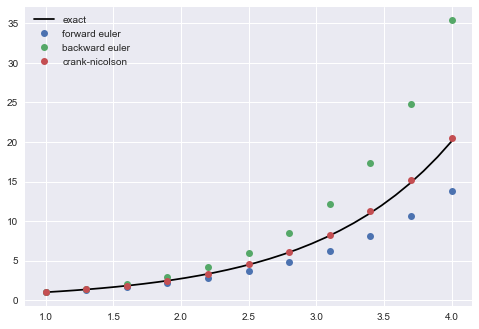

In [44]:
t1_ex = np.linspace(t1_0, t1_N, 30)
y1_ex = np.exp(t1_ex - 1)

plt.plot(t1_ex, y1_ex, "k", label="exact")
plt.plot(t1_fe, y1_fe, "o", label="forward euler")
plt.plot(t1_be, y1_be, "o", label="backward euler")
plt.plot(t1_cn, y1_cn, "o", label="crank-nicolson")
plt.legend()

#### Test 2

In [113]:
def g(y, t, a, b, c, d):
    predator = b * y[0] * y[1] - a * y[0]
    prey = c * y[1] - d * y[0] * y[1]
    return np.array([predator, prey])

def f2(y, t):
    return g(y, t, 1, 0.1, 4, 1)

y2_0 = np.array([3, 5])
t2_0 = 0
t2_N = 10
N2 = 10

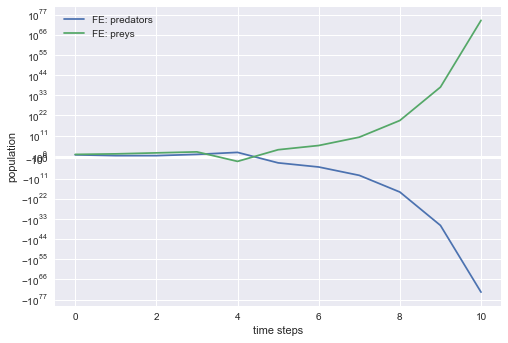

In [114]:
t2_fe, y2_fe = forward_euler(f2, y2_0, t2_0, t2_N, N2)

plt.plot(t2_fe, y2_fe[:, 0], label="FE: predators")
plt.plot(t2_fe, y2_fe[:, 1], label="FE: preys")
plt.xlabel("time steps")
plt.ylabel("population")
plt.yscale("symlog")
plt.legend()

Fixed-point iteration did not converge for <function backward_euler.<locals>.g at 0x000001E15803EE50>.
Fixed-point iteration did not converge for <function backward_euler.<locals>.g at 0x000001E15803EE50>.
Fixed-point iteration did not converge for <function backward_euler.<locals>.g at 0x000001E15803EE50>.
Fixed-point iteration did not converge for <function backward_euler.<locals>.g at 0x000001E15803EE50>.
Fixed-point iteration did not converge for <function backward_euler.<locals>.g at 0x000001E15803EE50>.
Fixed-point iteration did not converge for <function backward_euler.<locals>.g at 0x000001E15803EE50>.
Fixed-point iteration did not converge for <function backward_euler.<locals>.g at 0x000001E15803EE50>.


<ipython-input-113-f3cf14d5bad9>:2: RuntimeWarning: overflow encountered in double_scalars
  predator = b * y[0] * y[1] - a * y[0]
<ipython-input-113-f3cf14d5bad9>:3: RuntimeWarning: overflow encountered in double_scalars
  prey = c * y[1] - d * y[0] * y[1]
<ipython-input-113-f3cf14d5bad9>:2: RuntimeWarning: invalid value encountered in double_scalars
  predator = b * y[0] * y[1] - a * y[0]


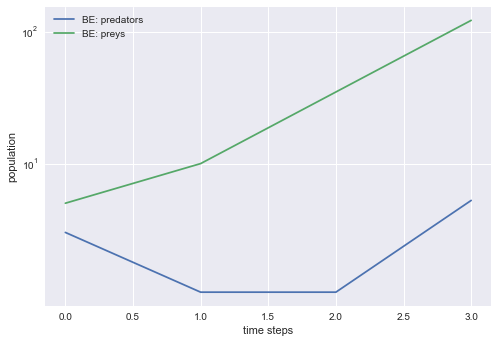

In [116]:
t2_be, y2_be = backward_euler(f2, y2_0, t2_0, t2_N, N2, tol=100)

plt.plot(t2_be, y2_be[:, 0], label="BE: predators")
plt.plot(t2_be, y2_be[:, 1], label="BE: preys")
plt.xlabel("time steps")
plt.ylabel("population")
plt.yscale("symlog")
plt.legend()

Fixed-point iteration did not converge for <function crank_nicolson.<locals>.g at 0x000001E1580140D0>.
Fixed-point iteration did not converge for <function crank_nicolson.<locals>.g at 0x000001E1580140D0>.
Fixed-point iteration did not converge for <function crank_nicolson.<locals>.g at 0x000001E1580140D0>.
Fixed-point iteration did not converge for <function crank_nicolson.<locals>.g at 0x000001E1580140D0>.
Fixed-point iteration did not converge for <function crank_nicolson.<locals>.g at 0x000001E1580140D0>.
Fixed-point iteration did not converge for <function crank_nicolson.<locals>.g at 0x000001E1580140D0>.
Fixed-point iteration did not converge for <function crank_nicolson.<locals>.g at 0x000001E1580140D0>.


<ipython-input-113-f3cf14d5bad9>:2: RuntimeWarning: overflow encountered in double_scalars
  predator = b * y[0] * y[1] - a * y[0]
<ipython-input-113-f3cf14d5bad9>:3: RuntimeWarning: overflow encountered in double_scalars
  prey = c * y[1] - d * y[0] * y[1]
<ipython-input-113-f3cf14d5bad9>:2: RuntimeWarning: invalid value encountered in double_scalars
  predator = b * y[0] * y[1] - a * y[0]


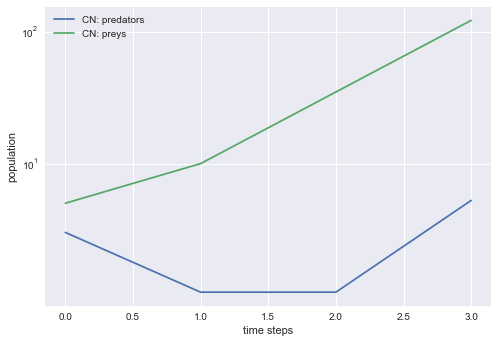

In [115]:
t2_cn, y2_cn = crank_nicolson(f2, y2_0, t2_0, t2_N, N2, tol=100)

plt.plot(t2_cn, y2_cn[:, 0], label="CN: predators")
plt.plot(t2_cn, y2_cn[:, 1], label="CN: preys")
plt.xlabel("time steps")
plt.ylabel("population")
plt.yscale("symlog")
plt.legend()